In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
# 手动将手写数据集变成及其偏斜的数据。不是9的y=0，是9的y=1
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

E:\Anoconda2019\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9755555555555555

In [14]:
y_log_predict = log_reg.predict(X_test)

In [17]:
def TN(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==0) & (y_predict==0))
TN(y_test,y_log_predict)
    

403

In [18]:
def FP(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==0) & (y_predict==1))
FP(y_test,y_log_predict)

2

In [19]:
def FN(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==1) & (y_predict==0))
FN(y_test,y_log_predict)

9

In [21]:
def TP(y_true,y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true==1) & (y_predict==1))
TP(y_test,y_log_predict)

36

In [22]:
def confusion_matrix(y_true,y_predict):
    return np.array([
        [TN(y_true,y_predict),FP(y_true,y_predict)],
        [FN(y_true,y_predict),TP(y_true,y_predict)]
    ])

confusion_matrix(y_test,y_log_predict)

array([[403,   2],
       [  9,  36]])

In [23]:
def precision_score(y_true,y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0
    
precision_score(y_test, y_log_predict)

0.9473684210526315

In [24]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0
recall_score(y_test, y_log_predict)

0.8

# scikit-learn中的混淆矩阵，精准率和召回率

In [25]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [26]:
confusion_matrix(y_test,y_log_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [27]:
precision_score(y_test, y_log_predict)

0.9473684210526315

In [28]:
recall_score(y_test, y_log_predict)

0.8

# F1 Score 的实现

In [29]:
import numpy as np

In [30]:
def f1_score(precision,recall):
    return 2 * (precision * recall) / (precision + recall)

In [31]:
precision = 0.5
recall = 0.5
f1_score(precision,recall)

0.5

In [33]:
precision = 0.1
recall = 0.9
f1_score(precision,recall)
# 有一个非常小，整体就非常小

0.18000000000000002

In [34]:
precision = 0.9
recall = 0
f1_score(precision, recall)

0.0

In [35]:
precision = 0.9
recall = 0.95
f1_score(precision, recall)
# 只有都非常大，结果才会打

0.9243243243243242

# sklearn中的f1_score

sklearn中的f1_score传入的参数为y_test,y_log_predict，与我们自己封装的不同

In [36]:
from sklearn.metrics import f1_score
f1_score(y_test, y_log_predict)

0.8674698795180723

# 编码观察精准率和召回率的平衡

In [38]:
# 结果即为对于每一个样本来说，在逻辑回归算法中对应的score值是什么
log_reg.decision_function(X_test)[:10]

array([-21.45600241, -32.94974484, -16.40358049, -79.91453954,
       -48.16618205, -24.21675714, -44.76256848, -24.22873941,
        -1.22419553, -19.07705062])

In [39]:
# 因为对于前10个样本来说，分数值都是小于0 的，所以预测值都是0
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
decision_scores = log_reg.decision_function(X_test)
print(np.min(decision_scores))
print(np.max(decision_scores))

-85.76642438512
19.975142566998983


In [45]:
y_predict2 = np.array(decision_scores >= 5 ,dtype='int')
confusion_matrix(y_test,y_predict2)

array([[404,   1],
       [ 21,  24]], dtype=int64)

In [46]:
# 升高threshold后,精准率升高，召回率降低
print(precision_score(y_test, y_predict2))
print(recall_score(y_test, y_predict2))

0.96
0.5333333333333333


In [47]:
y_predict2 = np.array(decision_scores >= -5 ,dtype='int')
confusion_matrix(y_test,y_predict2)

array([[389,  16],
       [  5,  40]], dtype=int64)

In [48]:
print(precision_score(y_test, y_predict2))
print(recall_score(y_test, y_predict2))

0.7142857142857143
0.8888888888888888


# 精准率-召回率曲线

In [49]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores),np.max(decision_scores))
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold , dtype = 'int')
    precisions.append(precision_score(y_test,y_predict))
    recalls.append(recall_score(y_test,y_predict))

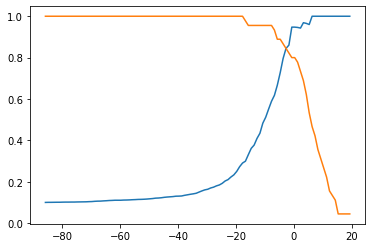

In [50]:
import matplotlib.pyplot as plt
plt.plot(thresholds,precisions)
plt.plot(thresholds,recalls)
plt.show()

# Precision-Recall 曲线

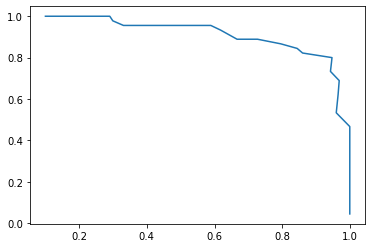

In [51]:
plt.plot(precisions, recalls)

通过曲线再次印证了，精准率和召回率是相互制约的，这个曲线急剧下降的一个点，可能就是精准率和召回率平衡最好的一个位置

# scikit-learn中的Precision-Recall 曲线

In [52]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)

In [53]:
# sklearn中会根据decision_scores的值来取最合适的步长
precisions.shape

(149,)

In [54]:
recalls.shape

(149,)

In [56]:
# The last precision and recall values are 1. and 0. respectively and do not have a corresponding threshold. 
# This ensures that the graph starts on the x axis.
thresholds.shape

(148,)

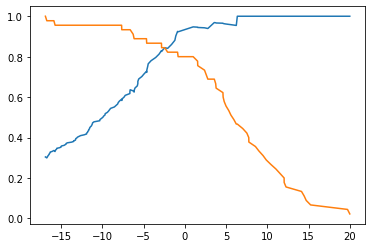

In [57]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
# 没有从最小值开始取，在sklearn的封装中，他自动寻找了他认为最重要的数据
plt.show()

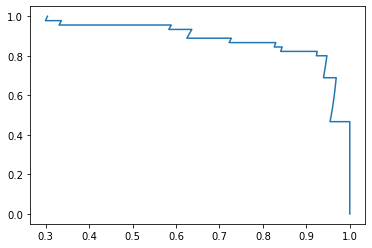

In [58]:
plt.plot(precisions, recalls)

我们用不同的超参数训练不同的模型，每得到一个新的模型，就可以得到一根不同的P-R曲线，如果这个P-R曲线更靠外（也就是与X轴，Y轴所包围的面积越大），那么说明这根曲线对应的模型越好，因为对应这个曲线上的每一个点，他的precision_score和recall_score都比另一个曲线要大

# scikit-learn中的ROC曲线

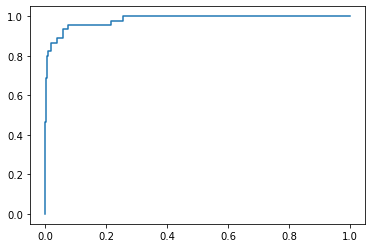

In [59]:
from sklearn.metrics import roc_curve
fprs,tprs,thresholds = roc_curve(y_test,decision_scores)
plt.plot(fprs,tprs)

In [60]:
# 计算ROC曲线的面积
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, decision_scores)

0.9823868312757201

对于ROC曲线，我们通常关注的是这根曲线下面的面积的大小，面积越大，代表分类算法效果越好。 在fpr越低的时候（犯fp错误的次数越少的时候），相应的FPR越高的时候，这根曲线整体就会被抬的越高， 他的面积相应的也会越大，这种情况下分类算法的效果就更好

对于ROC曲线来说，他对于有偏的数据并不是那么敏感，所以在有偏的数据集里，看一下精准率和召回率是非常有必要的 而ROC的应用场景是比较两个模型的优劣

# 多分类问题中的混淆矩阵

In [61]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [63]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
# sklearn 的 逻辑回归，如果我们传进来的数据集有多个分类，他讲使用OVR的方式来解决多分类的问题
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

E:\Anoconda2019\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9506258692628651

In [64]:
y_predict = log_reg.predict(X_test)

In [65]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predict,average='micro')

0.9506258692628651

In [66]:
from sklearn.metrics import confusion_matrix
# sklearn 的混淆矩阵天然支持多分类问题
# 第i行第j列的数值代表 真值为i而预测为j的样本数量有多少
confusion_matrix(y_test, y_predict)

array([[138,   0,   0,   0,   1,   2,   0,   0,   0,   0],
       [  0, 136,   2,   1,   1,   2,   0,   0,   6,   0],
       [  0,   0, 150,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 138,   0,   5,   0,   1,   1,   1],
       [  0,   1,   0,   0, 136,   0,   0,   2,   1,   3],
       [  0,   0,   2,   1,   0, 144,   0,   0,   0,   4],
       [  0,   2,   0,   0,   1,   0, 136,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 136,   1,   2],
       [  1,   8,   4,   1,   0,   1,   3,   1, 116,   1],
       [  0,   2,   0,   0,   0,   3,   0,   1,   1, 137]], dtype=int64)

In [67]:
cfm = confusion_matrix(y_test, y_predict)

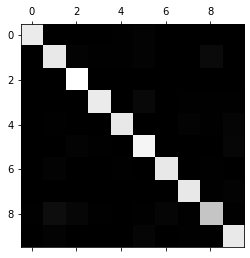

In [68]:
# 绘制混淆矩阵，越亮的地方说明数值越大
plt.matshow(cfm, cmap=plt.cm.gray)

In [69]:
# 每一行有多少样本,在列方向上求和
row_sums = np.sum(cfm, axis=1)

In [70]:
# 矩阵中的每一行的数字都会除以这一行的数字和得到的一个百分比矩阵
err_matrix = cfm / row_sums

In [71]:
# 将对角线上的数字全都填成是0，剩下的其他的格子就是犯错误的百分比
np.fill_diagonal(err_matrix, 0)

In [72]:
err_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.00699301,
        0.01324503, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.01333333, 0.00684932, 0.00699301,
        0.01324503, 0.        , 0.        , 0.04411765, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03311258, 0.        , 0.00719424, 0.00735294, 0.00694444],
       [0.        , 0.00675676, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01438849, 0.00735294, 0.02083333],
       [0.        , 0.        , 0.01333333, 0.00684932, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02777778],
       [0.        , 0.01351351, 0.        , 0.        , 0.00699301,
        0.        , 0.        , 0.        , 0.00735294, 0.        ],
       [0.        , 0.        , 0.       

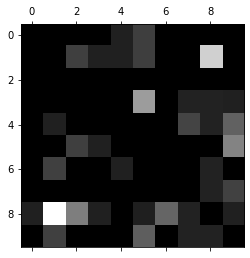

In [73]:
# 多分类问题中越亮的地方代表的就是犯错误越多的地方，并且通过横纵坐标可以看出具体的错误
plt.matshow(err_matrix, cmap=plt.cm.gray)

通过这样一个矩阵，我们就可以很清晰的发现分类的错误，并且更重要的是，可以看出具体的错误类型，比如有很多的8我们把他规约为了1，有很多1我们规约成了8，有了这些提示，我们就可以进一步改进我们的算法了。

我们可以看到，这个分类的结果，我们又把他规约成了一个二分类的问题，我们现在的分类的结果很容易混淆1和9以及1和8，相应的我们可以微调1和9和1和8分类问题 中的阈值，来相应的调整多分类问题的准确度